In [6]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from joblib import dump
import optuna
from optuna.integration import LightGBMPruningCallback
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import optuna
from optuna.integration import LightGBMPruningCallback
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import joblib
import optuna.visualization as vis
import matplotlib.pyplot as plt
import shap
import lightgbm
import xgboost as xgb
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from joblib import dump
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from joblib import dump
import optuna
from optuna.integration import LightGBMPruningCallback
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import optuna
from optuna.integration import LightGBMPruningCallback
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import joblib
import optuna.visualization as vis
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings("ignore")
import optuna



In [7]:
# モデルを読み込む
CatBoost = CatBoostRegressor()
CatBoost.load_model('../models/CatBoost')

# データの読み込み
train_data = pd.read_csv('../data_processed/train_data_processed.csv')
X = train_data.drop(['attendance'], axis=1)

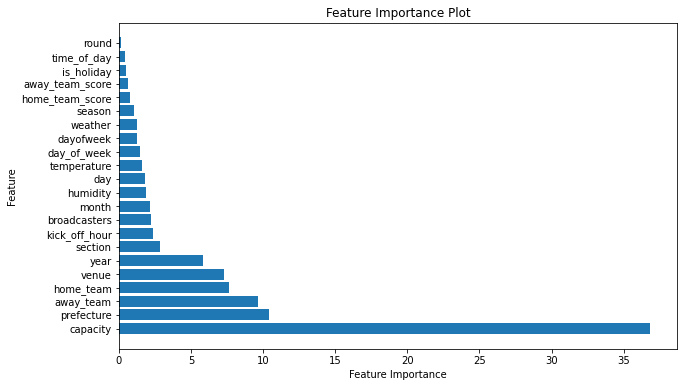

In [8]:
# 特徴量の重要度を取得
feature_importance = CatBoost.get_feature_importance()

# 特徴量の名前を指定（モデル作成時に使用した特徴量の順序で指定する必要があります）
feature_names = X.columns.tolist()

# 重要度の降順で特徴量を表示
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# バーンプロットを作成
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

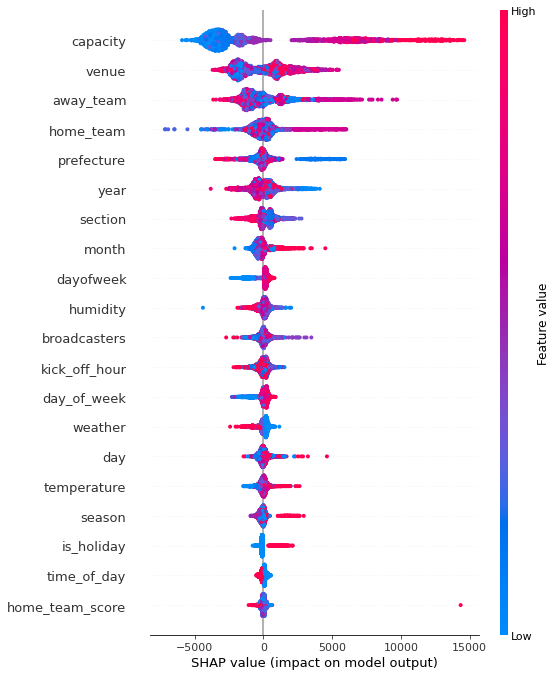

In [9]:
# SHAP値を計算
explainer = shap.TreeExplainer(CatBoost)  # CatBoostモデルを指定します

# 特定のインスタンスのSHAP値を表示
instance_index = 0  # 解析したいインスタンスのインデックスを指定
shap_values = explainer.shap_values(X.iloc[[instance_index]])  # 修正：インデックスをリストで指定
shap.force_plot(explainer.expected_value, shap_values[0], X.iloc[[instance_index]])  # 修正：インデックスをリストで指定

# 全体のSHAP値を表示
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)
